In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


## Data Gathering

In [3]:
df=pd.read_csv("../Datasets/Sentiment140.csv",encoding = 'latin')
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']
df.head()

,sentiment,id,date,query,user_id,text
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [25]:
df.drop(["id","date","query","user_id"],axis=1)

,sentiment,text
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,1,Just woke up. Having no school is the best fee...
1599995,1,TheWDB.com - Very cool to hear old Walt interv...
1599996,1,Are you ready for your MoJo Makeover? Ask me f...
1599997,1,Happy 38th Birthday to my boo of alll time!!! ...


In [10]:
df["sentiment"]=df["sentiment"].map({0: 0, 4:1})

In [11]:
x=df["text"]
y=df["sentiment"]

In [12]:
print("Total data train",x.shape)
print("Total label",y.shape)
print("tipe data train",type(x))
print("tipe label",type(y))

Total data train (1599999,)
Total label (1599999,)
tipe data train <class 'pandas.core.series.Series'>
tipe label <class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Sentiment Data Distribution')

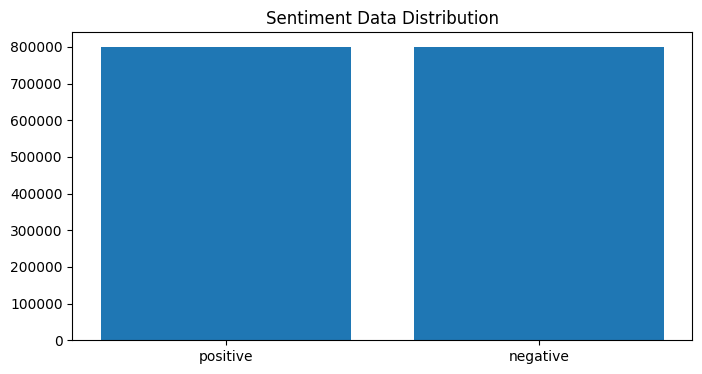

In [19]:
val_count = df.sentiment.value_counts()

plt.figure(figsize=(8,4))
plt.bar(["positive","negative"], val_count.values)
plt.title("Sentiment Data Distribution")

## Text Preprocessing

In [26]:
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arthu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [29]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')
text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [31]:
# test stemming
print(stemmer.stem("airliner"))
print(stemmer.stem("formality"))
print(stemmer.stem("adjustable"))

airlin
formal
